In [44]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu

In [45]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'SWISS_MaleUrine_Exposure'
subjects = ace.list_subjects(root_directory)
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'

In [46]:
# Take the first SW < 18 without SW1
subjects = [sub for sub in subjects if sub[0:2]=='SW' and int(sub[2:].split('_')[0]) in set(range(2,19))]
subjects

['SW3_Fam',
 'SW8_Unfam',
 'SW18_Control',
 'SW11_Fam',
 'SW6_Control',
 'SW17_Fam',
 'SW7_Control',
 'SW15_Fam',
 'SW13_Control',
 'SW10_Unfam',
 'SW9_Fam',
 'SW12_Control']

In [47]:
# load query file where we added volumes for each area
volumes = pd.read_csv("query_volumes_reordered.csv")
volumes = ace.clean_volumes_database(volumes)

In [48]:
volumes

,id,atlas_id,name,st_level,parent_structure_id,depth,structure_id_path,safe_name,mean_volume,0,1,2,3,4,5,6,7,8,9,10
0,997,-1.0,root,0,NaN,0,/997/,root,435.287861,997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,0.0,Basic cell groups and regions,1,997.0,1,/997/8/,Basic cell groups and regions,197.462441,997,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,567,70.0,Cerebrum,2,8.0,2,/997/8/567/,Cerebrum,120.883542,997,8.0,567.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,688,85.0,Cerebral cortex,3,567.0,3,/997/8/567/688/,Cerebral cortex,97.403809,997,8.0,567.0,688.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,695,86.0,Cortical plate,4,688.0,4,/997/8/567/688/695/,Cortical plate,93.461964,997,8.0,567.0,688.0,695.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,49,713.0,intraparafloccular fissure,8,1040.0,3,/997/1024/1040/49/,intraparafloccular fissure,NaN,997,1024.0,1040.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1323,57,714.0,paramedian sulcus,8,1040.0,3,/997/1024/1040/57/,paramedian sulcus,NaN,997,1024.0,1040.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1324,65,715.0,parafloccular sulcus,8,1040.0,3,/997/1024/1040/65/,parafloccular sulcus,NaN,997,1024.0,1040.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325,624,926.0,Interpeduncular fossa,7,1024.0,2,/997/1024/624/,Interpeduncular fossa,NaN,997,1024.0,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
def load_subject(subject):
    df_mouse = pd.read_csv(data_directory + subject + '/cells.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    return df_mouse

# Analysis on SWISS with father : threshold 100

In [50]:
# NB: Run only if file does not exist or needs to be regenerated
#dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject), 
#                                                                           vol=volumes, 
#                                                                           level=8) for subject in subjects}
# np.save('dict_results_across_mice_SW1-18.npy', dict_results_across_mice)

/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/pytho

In [112]:
dict_results_across_mice = np.load('dict_results_across_mice_SW1-18.npy', allow_pickle=True).item()

# List areas with null cell count

In [51]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}

<AxesSubplot:>

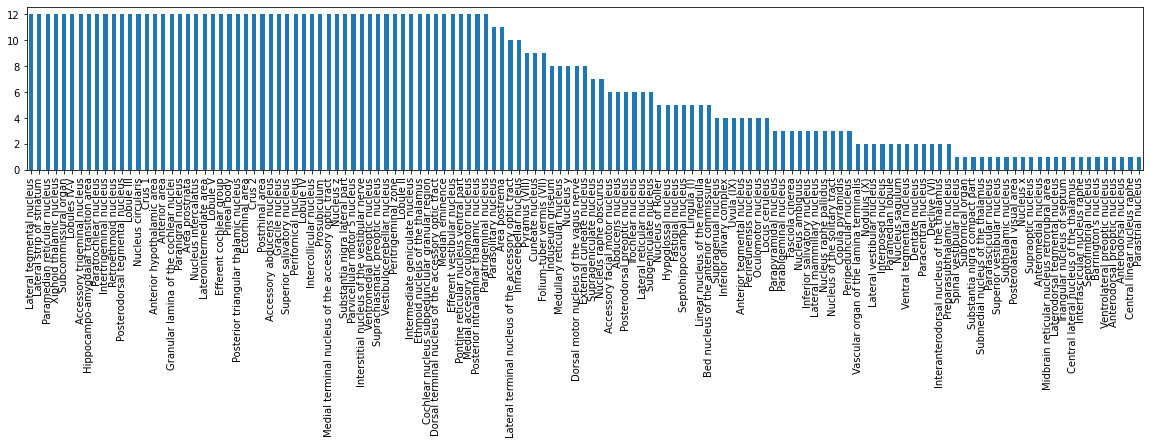

In [52]:
# make histogram of these
null_areas = [db_null_count[subjects[0]].area.values]
for subject in subjects[1:]:
    null_areas.append(db_null_count[subject].area.values)
null_areas = np.hstack(null_areas)
fig, ax = plt.subplots(1,1,figsize=(20,3))
pd.Series(null_areas).value_counts(sort=True).plot(kind='bar', axes=ax)


In [53]:
# print areas that are null for all mice
df = pd.DataFrame(pd.Series(null_areas).value_counts(sort=False))
df.columns = ['counts']
df = df[df.counts == 16]
print(df.to_string(), len(df))

Empty DataFrame
Columns: [counts]
Index: [] 0


# List areas with no volume

In [54]:
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}

<AxesSubplot:>

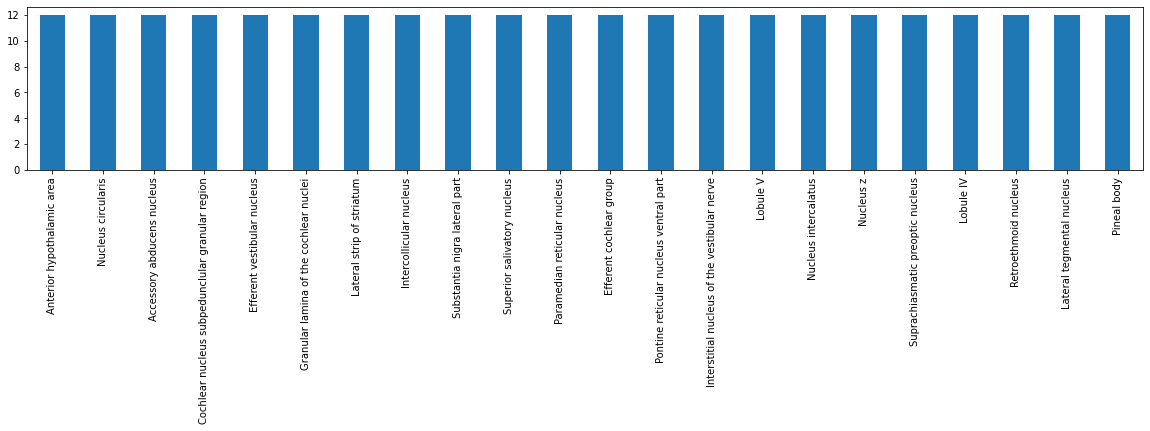

In [55]:
# make histogram of these
null_volume = [db_null_volume[subjects[0]].area.values]
for subject in subjects[1:]:
    null_volume.append(db_null_volume[subject].area.values)
null_volume = np.hstack(null_volume)
fig, ax = plt.subplots(1,1,figsize=(20,3))
pd.Series(null_volume).value_counts(sort=True).plot(kind='bar', axes=ax)

In [56]:
# print areas that are null for all mice
df = pd.DataFrame(pd.Series(null_volume).value_counts(sort=False))
df.columns = ['counts']
df = df[df.counts == 16]
print(df.to_string())

Empty DataFrame
Columns: [counts]
Index: []


# Divide mice into experimental groups: FAM/UNFAM/CONTROL

In [57]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
experimental_groups

{'Control': ['SW18_Control',
  'SW6_Control',
  'SW7_Control',
  'SW13_Control',
  'SW12_Control'],
 'Unfam': ['SW8_Unfam', 'SW10_Unfam'],
 'Fam': ['SW3_Fam', 'SW11_Fam', 'SW17_Fam', 'SW15_Fam', 'SW9_Fam']}

# NB: We have only two mice for UNFAM group. Results there are not to be considered

# Calculate cell count across experimental groups

In [58]:
def calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='n_cells'):
    """
    Value can either be n_cells or energy
    """
    df_control = pd.DataFrame()
    df_fam = pd.DataFrame()
    df_unfam = pd.DataFrame()
    for subject in experimental_groups['Control']:
        df_control['area'] = dict_results_across_mice[subject]['area']
        df_control[subject] = dict_results_across_mice[subject][value]
    for subject in experimental_groups['Fam']:
        df_fam['area'] = dict_results_across_mice[subject]['area']
        df_fam[subject] = dict_results_across_mice[subject][value]
    for subject in experimental_groups['Unfam']:
        df_unfam['area'] = dict_results_across_mice[subject]['area']
        df_unfam[subject] = dict_results_across_mice[subject][value]
    return df_control, df_fam, df_unfam

In [59]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [60]:
df_control_cell_count

,area,SW18_Control,SW6_Control,SW7_Control,SW13_Control,SW12_Control
0,Frontal pole cerebral cortex,5,114,462,96,162
1,Primary motor area,127,1127,3882,591,812
2,Secondary motor area,205,2366,8476,1377,2717
3,Primary somatosensory area,178,2635,9886,1467,1273
4,Supplemental somatosensory area,70,745,3974,682,722
...,...,...,...,...,...,...
293,Flocculus,8,1038,431,257,55
294,Fastigial nucleus,1,65,185,0,6
295,Interposed nucleus,7,91,451,10,7
296,Dentate nucleus,0,71,411,3,0


In [61]:
df_fam_cell_count

,area,SW3_Fam,SW11_Fam,SW17_Fam,SW15_Fam,SW9_Fam
0,Frontal pole cerebral cortex,150,182,267,32,44
1,Primary motor area,544,569,448,341,1771
2,Secondary motor area,1945,1515,3529,1202,4024
3,Primary somatosensory area,2104,1312,1795,991,5027
4,Supplemental somatosensory area,734,160,1058,463,2392
...,...,...,...,...,...,...
293,Flocculus,576,200,19,72,81
294,Fastigial nucleus,0,0,6,0,33
295,Interposed nucleus,14,0,19,1,76
296,Dentate nucleus,3,1,5,10,16


In [62]:
df_unfam_cell_count

,area,SW8_Unfam,SW10_Unfam
0,Frontal pole cerebral cortex,1216,604
1,Primary motor area,1782,3387
2,Secondary motor area,4915,8146
3,Primary somatosensory area,4623,6992
4,Supplemental somatosensory area,3950,3730
...,...,...,...
293,Flocculus,802,232
294,Fastigial nucleus,0,2
295,Interposed nucleus,0,18
296,Dentate nucleus,3,4


## Calculate t-tests across groups per area

In [66]:
df_ttest_ncells = ace.test_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count)
df_ttest_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.72325,0.0160126,0.00731247
1,Primary motor area,0.445114,0.332062,0.0290907
2,Secondary motor area,0.713282,0.226637,0.0236043
3,Primary somatosensory area,0.66727,0.403913,0.047158
4,Supplemental somatosensory area,0.736589,0.0758613,0.0068586
...,...,...,...,...
293,Flocculus,0.449828,0.664673,0.208027
294,Fastigial nucleus,0.261916,0.43555,0.554204
295,Interposed nucleus,0.32566,0.501532,0.60968
296,Dentate nucleus,0.291573,0.514341,0.474551


In [67]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_ttest_not_null_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.72325,0.0160126,0.00731247
1,Primary motor area,0.445114,0.332062,0.0290907
2,Secondary motor area,0.713282,0.226637,0.0236043
3,Primary somatosensory area,0.66727,0.403913,0.047158
4,Supplemental somatosensory area,0.736589,0.0758613,0.0068586
...,...,...,...,...
292,Paraflocculus,0.323285,0.735482,0.31744
293,Flocculus,0.449828,0.664673,0.208027
294,Fastigial nucleus,0.261916,0.43555,0.554204
295,Interposed nucleus,0.32566,0.501532,0.60968


In [68]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Ventral premammillary nucleus,0.000180692
Accessory olfactory bulb,0.00666953
Dorsal premammillary nucleus,0.00871171
Main olfactory bulb,0.0164949
Septofimbrial nucleus,0.0267482
Triangular nucleus of septum,0.0340182
Medial preoptic nucleus,0.0345017
Paragigantocellular reticular nucleus,0.0380326
Anterior olfactory nucleus,0.0525747


In [69]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Ventral premammillary nucleus,6.38008e-07
Supraoptic nucleus,0.000462872
Dorsal premammillary nucleus,0.00132709
Anterior tegmental nucleus,0.00192457
Interpeduncular nucleus,0.00690771
Superior central nucleus raphe,0.00922414
Mediodorsal nucleus of thalamus,0.0105126
Posterodorsal preoptic nucleus,0.0122352
Dorsal peduncular area,0.0140038


In [70]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Supraoptic nucleus,3.5828e-05
Anterior cingulate area,4.592e-05
Superior colliculus sensory related,0.000342566
Prelimbic area,0.000419548
Arcuate hypothalamic nucleus,0.000641999
Posterolateral visual area,0.000676108
Piriform area,0.000771206
Ventral cochlear nucleus,0.001075
Substantia innominata,0.00139972


## Mann Whitney Test for comparison across groups

In [71]:
df_mannwhitneyu_ncells = ace.test_across_groups(df_control=df_control_cell_count, 
                               df_fam=df_fam_cell_count, 
                               df_unfam=df_unfam_cell_count,
                                           test='mannwhitneyu')
df_mannwhitneyu_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.5,0.0406806,0.0406806
1,Primary motor area,0.201698,0.166461,0.0406806
2,Secondary motor area,0.5,0.166461,0.0406806
3,Primary somatosensory area,0.5,0.166461,0.0876221
4,Supplemental somatosensory area,0.5,0.166461,0.0406806
...,...,...,...,...
293,Flocculus,0.417266,0.423225,0.0876221
294,Fastigial nucleus,0.139821,0.217223,0.5
295,Interposed nucleus,0.26481,0.278869,0.347971
296,Dentate nucleus,0.458154,0.5,0.347971


In [72]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_mannwhitneyu_not_null_ncells = df_mannwhitneyu_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_mannwhitneyu_not_null_ncells

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.5,0.0406806,0.0406806
1,Primary motor area,0.201698,0.166461,0.0406806
2,Secondary motor area,0.5,0.166461,0.0406806
3,Primary somatosensory area,0.5,0.166461,0.0876221
4,Supplemental somatosensory area,0.5,0.166461,0.0406806
...,...,...,...,...
292,Paraflocculus,0.5,0.423225,0.166461
293,Flocculus,0.417266,0.423225,0.0876221
294,Fastigial nucleus,0.139821,0.217223,0.5
295,Interposed nucleus,0.26481,0.278869,0.347971


In [73]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_mannwhitneyu_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Ventral premammillary nucleus,0.00596262
Accessory olfactory bulb,0.00609289
Septofimbrial nucleus,0.0180726
Dorsal premammillary nucleus,0.0183569
Medial preoptic nucleus,0.0183569
Rostral linear nucleus raphe,0.0288898
Declive (VI),0.0296635
Interfascicular nucleus raphe,0.0296635
Paragigantocellular reticular nucleus,0.0300514


In [74]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_mannwhitneyu_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Posterodorsal preoptic nucleus,0.0272417
Anterior tegmental nucleus,0.0339041
Supraoptic nucleus,0.0393214
Ventral premammillary nucleus,0.0393214
Nucleus prepositus,0.0393214
Frontal pole cerebral cortex,0.0406806
Olfactory tubercle,0.0406806
Septofimbrial nucleus,0.0406806
Bed nucleus of the accessory olfactory tract,0.0406806


In [75]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_mannwhitneyu_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Parasubiculum,0.0393214
Subthalamic nucleus,0.0393214
Supraoptic nucleus,0.0393214
Nucleus raphe pallidus,0.0393214
Nucleus raphe magnus,0.0393214
Superior colliculus sensory related,0.0406806
Bed nucleus of the accessory olfactory tract,0.0406806
Anterior amygdalar area,0.0406806
Inferior colliculus,0.0406806


## Code to calculate cross corr matrix

In [76]:
def cross_corr(df):
    # remove areas where no cells have been detected in any mouse
    # and remove rows with all nans
    corr_matrix = df.set_index('area').loc[
        ~(df.set_index('area')==0).all(axis=1)].dropna(axis=0).T.corr(method='pearson')
    return corr_matrix

## Filter matrix based on pvalues < 0.05 per group
Reorder based on anatomy

## Calculate cross corr across groups per area on cell count

In [77]:
corr_matrix_control_ncells = cross_corr(df_control_cell_count)
corr_matrix_control_ncells

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Uvula (IX),Nodulus (X),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus,Flocculus,Fastigial nucleus,Interposed nucleus,Dentate nucleus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.000000,0.981005,0.996473,0.967174,0.983630,0.974543,0.982715,0.971557,0.840198,0.984485,...,-0.218907,-0.127721,0.849300,0.185122,0.637196,0.840283,0.175707,0.916802,0.940798,0.942591
Primary motor area,0.981005,1.000000,0.990877,0.996958,0.992943,0.935590,0.997435,0.992289,0.887085,0.957734,...,-0.138125,-0.016045,0.918053,0.281968,0.665547,0.917331,0.283759,0.975282,0.986217,0.986162
Secondary motor area,0.996473,0.990877,1.000000,0.978230,0.985901,0.973280,0.993895,0.977316,0.868854,0.977002,...,-0.204419,-0.080263,0.882864,0.216125,0.642514,0.878064,0.224851,0.944142,0.959003,0.959775
Primary somatosensory area,0.967174,0.996958,0.978230,1.000000,0.992264,0.905655,0.989803,0.995564,0.880065,0.944251,...,-0.104087,0.001845,0.921099,0.306492,0.670932,0.921751,0.295991,0.979558,0.992499,0.992405
Supplemental somatosensory area,0.983630,0.992943,0.985901,0.992264,1.000000,0.924475,0.984146,0.998137,0.831415,0.975281,...,-0.188390,-0.110434,0.870028,0.210527,0.622392,0.869220,0.187779,0.950116,0.979881,0.981728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paraflocculus,0.840283,0.917331,0.878064,0.921751,0.869220,0.805859,0.924559,0.882709,0.968470,0.770614,...,0.125208,0.345866,0.996386,0.552304,0.754430,1.000000,0.607482,0.974914,0.926421,0.919880
Flocculus,0.175707,0.283759,0.224851,0.295991,0.187779,0.175713,0.310993,0.207445,0.674981,0.013957,...,0.781665,0.952666,0.631797,0.952983,0.762971,0.607482,1.000000,0.420235,0.279283,0.263402
Fastigial nucleus,0.916802,0.975282,0.944142,0.979558,0.950116,0.867902,0.973591,0.960516,0.921060,0.880529,...,-0.047548,0.135209,0.966327,0.385508,0.672171,0.974914,0.420235,1.000000,0.986621,0.983737


In [78]:
corr_matrix_fam_ncells = cross_corr(df_fam_cell_count)
corr_matrix_fam_ncells

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Uvula (IX),Nodulus (X),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus,Flocculus,Fastigial nucleus,Interposed nucleus,Dentate nucleus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.000000,-0.442972,0.153919,-0.361231,-0.314435,-0.013360,-0.408641,-0.498813,-0.440252,0.100824,...,-0.265755,-0.021225,-0.589651,-0.488501,-0.487883,-0.169143,0.064775,-0.392054,-0.349248,-0.729034
Primary motor area,-0.442972,1.000000,0.699845,0.974843,0.899932,0.234738,0.968385,0.992571,0.121655,0.837194,...,0.571633,0.043916,0.790966,0.984594,0.987463,0.805061,-0.175053,0.966891,0.957746,0.739397
Secondary motor area,0.153919,0.699845,1.000000,0.788949,0.882054,-0.140351,0.811388,0.643913,-0.306119,0.926742,...,0.370335,-0.051095,0.428206,0.714501,0.721990,0.600530,-0.363458,0.814324,0.842397,0.522897
Primary somatosensory area,-0.361231,0.974843,0.788949,1.000000,0.956277,0.037465,0.975834,0.973313,0.170913,0.884840,...,0.680923,0.178139,0.841405,0.989536,0.987777,0.867580,-0.097481,0.963867,0.988911,0.727066
Supplemental somatosensory area,-0.314435,0.899932,0.882054,0.956277,1.000000,-0.143849,0.974032,0.882882,0.011366,0.865907,...,0.577195,0.071273,0.753168,0.939479,0.942197,0.738712,-0.267696,0.963330,0.986607,0.807981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paraflocculus,-0.169143,0.805061,0.600530,0.867580,0.738712,-0.028074,0.738023,0.841889,0.500044,0.792800,...,0.902918,0.586849,0.872012,0.828420,0.810036,1.000000,0.386959,0.706871,0.796443,0.354924
Flocculus,0.064775,-0.175053,-0.363458,-0.097481,-0.267696,-0.250434,-0.304328,-0.073563,0.859698,-0.173608,...,0.628383,0.920273,0.327466,-0.121672,-0.158376,0.386959,1.000000,-0.355936,-0.219445,-0.475697
Fastigial nucleus,-0.392054,0.966891,0.814324,0.963867,0.963330,0.113812,0.997630,0.940808,-0.051347,0.859168,...,0.471386,-0.080655,0.713176,0.966189,0.974323,0.706871,-0.355936,1.000000,0.984169,0.823284


In [79]:
corr_matrix_unfam_ncells = cross_corr(df_unfam_cell_count)
corr_matrix_unfam_ncells

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Uvula (IX),Nodulus (X),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus,Flocculus,Fastigial nucleus,Interposed nucleus,Dentate nucleus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
Primary motor area,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Secondary motor area,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Primary somatosensory area,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Supplemental somatosensory area,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paraflocculus,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Flocculus,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
Fastigial nucleus,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0


## Plot cross corr matrix across groups per area on cell count

Text(0.5, 1.0, 'CONTROL')

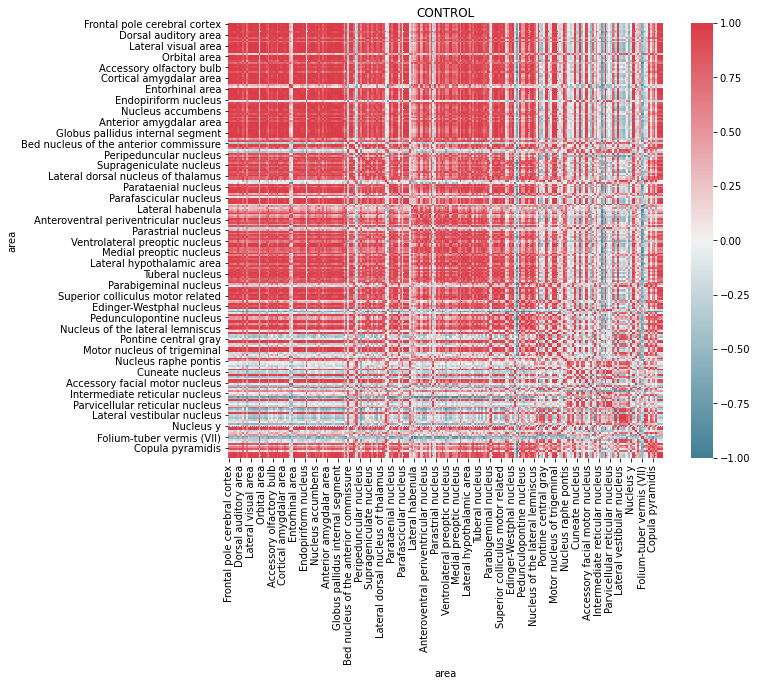

In [80]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

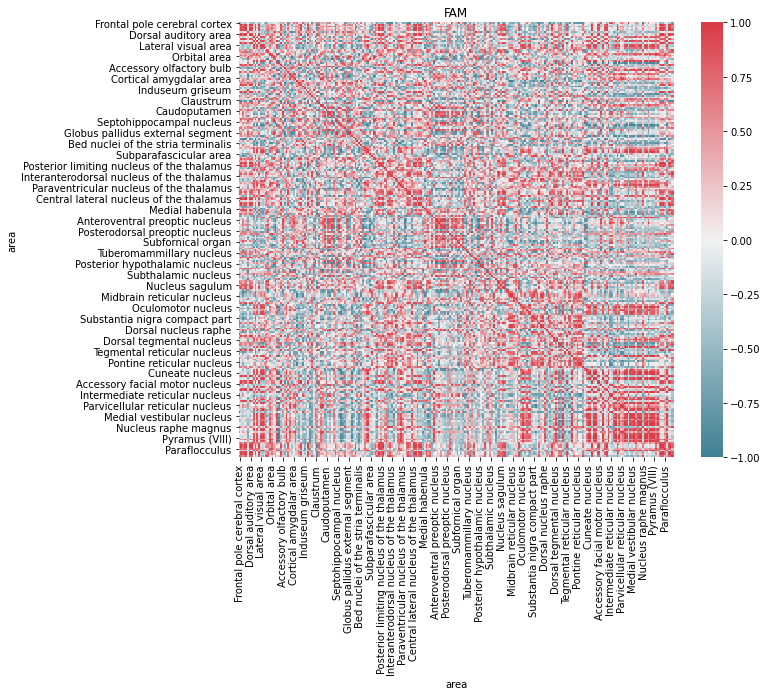

In [81]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

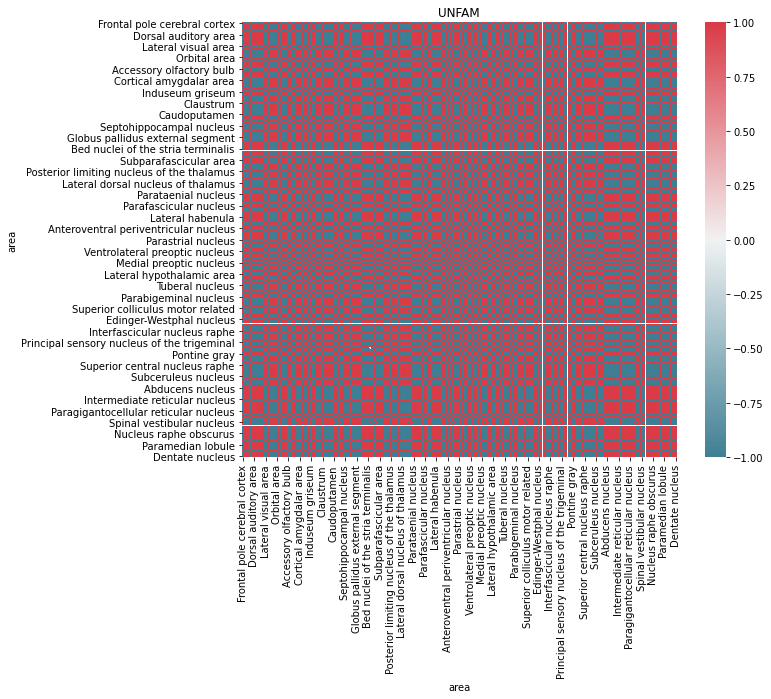

In [82]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate energy across experimental groups

In [83]:
df_control_energy, df_fam_energy, df_unfam_energy = \
calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

In [84]:
df_control_energy

,area,SW18_Control,SW6_Control,SW7_Control,SW13_Control,SW12_Control
0,Frontal pole cerebral cortex,5175.926759,120153.583353,5.435224e+05,96592.604561,170481.211628
1,Primary motor area,11322.609164,108558.015697,4.079382e+05,52610.541555,70385.881971
2,Secondary motor area,15899.830881,207780.055664,8.082183e+05,106894.144933,226251.101962
3,Primary somatosensory area,7706.214439,125169.350123,5.110172e+05,59877.471079,53708.745683
4,Supplemental somatosensory area,7657.227024,93316.871812,5.569245e+05,80627.738242,85560.935173
...,...,...,...,...,...,...
293,Flocculus,6715.522882,997666.233634,4.200555e+05,189035.398489,42356.989656
294,Fastigial nucleus,2537.433062,134268.915612,4.403651e+05,0.000000,13078.532107
295,Interposed nucleus,7796.233827,109650.417099,6.531600e+05,11564.828645,9196.068782
296,Dentate nucleus,0.000000,229014.379298,1.592691e+06,9392.770762,0.000000


In [85]:
df_fam_energy

,area,SW3_Fam,SW11_Fam,SW17_Fam,SW15_Fam,SW9_Fam
0,Frontal pole cerebral cortex,181541.876780,188223.527687,262682.788188,27020.940664,45500.100455
1,Primary motor area,50278.278965,51876.321699,40298.649054,31934.223921,171039.691482
2,Secondary motor area,175404.627769,127174.348029,291180.667564,92615.972032,340290.882017
3,Primary somatosensory area,99511.538751,58637.114750,78215.471271,44183.410440,246316.763377
4,Supplemental somatosensory area,99567.042770,21450.182756,126419.864065,55339.299390,327063.267817
...,...,...,...,...,...,...
293,Flocculus,540213.777946,178593.147907,20446.459030,60030.305017,69641.960321
294,Fastigial nucleus,0.000000,0.000000,11551.771535,0.000000,78260.456675
295,Interposed nucleus,16327.256465,0.000000,20813.204427,1125.845907,96538.795737
296,Dentate nucleus,8415.450341,3109.059596,13400.440410,32658.244151,51634.002401


In [86]:
df_unfam_energy

,area,SW8_Unfam,SW10_Unfam
0,Frontal pole cerebral cortex,1.728723e+06,725430.663388
1,Primary motor area,1.870467e+05,333278.805198
2,Secondary motor area,4.778288e+05,756176.186609
3,Primary somatosensory area,2.348711e+05,338871.829537
4,Supplemental somatosensory area,5.330824e+05,519127.562724
...,...,...,...
293,Flocculus,8.315691e+05,204547.144393
294,Fastigial nucleus,0.000000e+00,4485.665566
295,Interposed nucleus,0.000000e+00,23069.877860
296,Dentate nucleus,1.050128e+04,14030.123366


## T-test on energy across groups

In [90]:
df_ttest_energy = ace.test_across_groups(df_control=df_control_energy,
                                      df_fam=df_fam_energy,
                                      df_unfam=df_unfam_energy)
df_ttest_energy

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.666951,0.0196889,0.011013
1,Primary motor area,0.443046,0.346821,0.0214718
2,Secondary motor area,0.657392,0.217691,0.0126875
3,Primary somatosensory area,0.653002,0.425388,0.0421363
4,Supplemental somatosensory area,0.739171,0.0815915,0.00655778
...,...,...,...,...
293,Flocculus,0.465249,0.612772,0.194847
294,Fastigial nucleus,0.276787,0.449511,0.564992
295,Interposed nucleus,0.32961,0.515183,0.634712
296,Dentate nucleus,0.298677,0.524992,0.551958


In [91]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_ttest_not_null_energy

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.666951,0.0196889,0.011013
1,Primary motor area,0.443046,0.346821,0.0214718
2,Secondary motor area,0.657392,0.217691,0.0126875
3,Primary somatosensory area,0.653002,0.425388,0.0421363
4,Supplemental somatosensory area,0.739171,0.0815915,0.00655778
...,...,...,...,...
292,Paraflocculus,0.321517,0.75919,0.225255
293,Flocculus,0.465249,0.612772,0.194847
294,Fastigial nucleus,0.276787,0.449511,0.564992
295,Interposed nucleus,0.32961,0.515183,0.634712


In [92]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Ventral premammillary nucleus,0.00054474
Accessory olfactory bulb,0.00402096
Main olfactory bulb,0.0158769
Dorsal premammillary nucleus,0.0242113
Triangular nucleus of septum,0.0306012
Septofimbrial nucleus,0.0380837
Medial preoptic nucleus,0.0460447
Paragigantocellular reticular nucleus,0.0511711
Anterior olfactory nucleus,0.0512538


In [93]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Ventral premammillary nucleus,4.71262e-06
Supraoptic nucleus,0.000285463
Anterior tegmental nucleus,0.00111791
Dorsal premammillary nucleus,0.00162181
Interpeduncular nucleus,0.00775922
Anterodorsal preoptic nucleus,0.00884789
Superior central nucleus raphe,0.0103193
Mediodorsal nucleus of thalamus,0.0106466
Anterior olfactory nucleus,0.0144913


In [94]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Supraoptic nucleus,1.20636e-05
Anterior cingulate area,2.99981e-05
Prelimbic area,0.000252285
Superior colliculus sensory related,0.0003967
Piriform area,0.000436192
Arcuate hypothalamic nucleus,0.000463478
Taenia tecta,0.0004707
Posterolateral visual area,0.000585106
Nucleus of reuniens,0.000712645


## Mann-Whitney Test across groups

In [98]:
df_mannwhitneyu_energy = ace.test_across_groups(df_control=df_control_energy,
                                      df_fam=df_fam_energy,
                                      df_unfam=df_unfam_energy,
                                    test='mannwhitneyu')
df_mannwhitneyu_energy

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.417266,0.0406806,0.0406806
1,Primary motor area,0.201698,0.166461,0.0406806
2,Secondary motor area,0.5,0.166461,0.0406806
3,Primary somatosensory area,0.5,0.166461,0.0876221
4,Supplemental somatosensory area,0.417266,0.166461,0.0406806
...,...,...,...,...
293,Flocculus,0.417266,0.280638,0.0876221
294,Fastigial nucleus,0.117931,0.217223,0.5
295,Interposed nucleus,0.265435,0.280638,0.5
296,Dentate nucleus,0.5,0.422539,0.423225


In [99]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_mannwhitneyu_not_null_energy = df_mannwhitneyu_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])
df_mannwhitneyu_not_null_energy

,area,pval_Control_vs_Fam,pval_Control_vs_Unfam,pval_Fam_vs_Unfam
0,Frontal pole cerebral cortex,0.417266,0.0406806,0.0406806
1,Primary motor area,0.201698,0.166461,0.0406806
2,Secondary motor area,0.5,0.166461,0.0406806
3,Primary somatosensory area,0.5,0.166461,0.0876221
4,Supplemental somatosensory area,0.417266,0.166461,0.0406806
...,...,...,...,...
292,Paraflocculus,0.5,0.423225,0.166461
293,Flocculus,0.417266,0.280638,0.0876221
294,Fastigial nucleus,0.117931,0.217223,0.5
295,Interposed nucleus,0.265435,0.280638,0.5


In [100]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_mannwhitneyu_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Accessory olfactory bulb,0.00609289
Lobule V,0.00609289
Lobule IV,0.00609289
Intercollicular nucleus,0.00609289
Paramedian reticular nucleus,0.00609289
Cochlear nucleus subpedunclular granular region,0.00609289
Nucleus intercalatus,0.00609289
Nucleus z,0.00609289
Anterior hypothalamic area,0.00609289


In [101]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_mannwhitneyu_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Posterodorsal preoptic nucleus,0.0272417
Anterior tegmental nucleus,0.0393214
Frontal pole cerebral cortex,0.0406806
Retroethmoid nucleus,0.0406806
Interpeduncular nucleus,0.0406806
Paramedian reticular nucleus,0.0406806
Nucleus raphe pontis,0.0406806
Pineal body,0.0406806
Efferent vestibular nucleus,0.0406806


In [102]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_mannwhitneyu_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Frontal pole cerebral cortex,0.417266
Inferior colliculus,0.105038
Superior colliculus sensory related,0.338052
Zona incerta,0.201698
Subthalamic nucleus,0.105038
Retrochiasmatic area,0.417266
Preparasubthalamic nucleus,0.172871
Lateral preoptic area,0.338052
Lateral hypothalamic area,0.5


## Calculate cross corr matrix across experimental groups on energy

In [103]:
corr_matrix_control_energy = cross_corr(df_control_energy)
corr_matrix_control_energy

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Uvula (IX),Nodulus (X),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus,Flocculus,Fastigial nucleus,Interposed nucleus,Dentate nucleus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.000000,0.982232,0.996288,0.971684,0.986184,0.982237,0.984031,0.978621,0.817521,0.988228,...,-0.198430,-0.120098,0.856635,0.228663,0.672337,0.869493,0.188478,0.937701,0.956102,0.956738
Primary motor area,0.982232,1.000000,0.991822,0.998242,0.993913,0.953392,0.996833,0.994737,0.872242,0.963730,...,-0.102840,-0.005706,0.921609,0.331042,0.708621,0.936301,0.298039,0.984949,0.991044,0.990466
Secondary motor area,0.996288,0.991822,1.000000,0.982806,0.988053,0.982913,0.995048,0.983694,0.852428,0.980225,...,-0.167193,-0.065612,0.891705,0.270298,0.680182,0.905352,0.246550,0.961639,0.970837,0.970618
Primary somatosensory area,0.971684,0.998242,0.982806,1.000000,0.992923,0.933841,0.991234,0.995875,0.869160,0.953958,...,-0.081845,0.008686,0.924530,0.346765,0.713658,0.940176,0.306539,0.988241,0.995242,0.994721
Supplemental somatosensory area,0.986184,0.993913,0.988053,0.992923,1.000000,0.944699,0.984938,0.998941,0.816553,0.980175,...,-0.168482,-0.097878,0.876301,0.255270,0.673888,0.894749,0.202459,0.965053,0.987143,0.988059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paraflocculus,0.869493,0.936301,0.905352,0.940176,0.894749,0.861571,0.942794,0.905944,0.970454,0.814703,...,0.160724,0.315561,0.996535,0.579175,0.776780,1.000000,0.592165,0.975951,0.933909,0.928859
Flocculus,0.188478,0.298039,0.246550,0.306539,0.202459,0.229937,0.328946,0.220115,0.716073,0.051142,...,0.823082,0.946848,0.639932,0.955336,0.703721,0.592165,1.000000,0.404212,0.273009,0.260069
Fastigial nucleus,0.937701,0.984949,0.961639,0.988241,0.965053,0.912375,0.982264,0.973043,0.908769,0.911705,...,-0.025007,0.107394,0.960038,0.410776,0.706880,0.975951,0.404212,1.000000,0.989076,0.986935


In [104]:
corr_matrix_fam_energy = cross_corr(df_fam_energy)
corr_matrix_fam_energy

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Uvula (IX),Nodulus (X),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus,Flocculus,Fastigial nucleus,Interposed nucleus,Dentate nucleus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.000000,-0.455032,0.127975,-0.371673,-0.354588,-0.042269,-0.446986,-0.508060,-0.321003,-0.004553,...,-0.117489,0.123533,-0.500505,-0.486486,-0.493883,-0.083493,0.224656,-0.440805,-0.381182,-0.807033
Primary motor area,-0.455032,1.000000,0.709518,0.977377,0.924046,0.237245,0.975641,0.995588,0.275295,0.880006,...,0.517498,0.031897,0.828200,0.988842,0.990670,0.781923,-0.182473,0.974558,0.966792,0.748314
Secondary motor area,0.127975,0.709518,1.000000,0.790352,0.867527,-0.144220,0.797772,0.665189,-0.098324,0.931358,...,0.395153,0.006374,0.539396,0.730940,0.730232,0.642971,-0.283810,0.796546,0.834917,0.462144
Primary somatosensory area,-0.371673,0.977377,0.790352,1.000000,0.968206,0.053281,0.975610,0.976462,0.345493,0.914596,...,0.641395,0.175946,0.889141,0.990585,0.987517,0.857552,-0.085320,0.964742,0.988605,0.722487
Supplemental somatosensory area,-0.354588,0.924046,0.867527,0.968206,1.000000,-0.106865,0.977384,0.916212,0.207379,0.904893,...,0.559232,0.086783,0.835101,0.958953,0.957889,0.759036,-0.227488,0.967112,0.990825,0.787027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paraflocculus,-0.083493,0.781923,0.642971,0.857552,0.759036,-0.039262,0.724181,0.797902,0.650271,0.798534,...,0.898625,0.607878,0.883579,0.799500,0.782814,1.000000,0.414821,0.694928,0.782640,0.333494
Flocculus,0.224656,-0.182473,-0.283810,-0.085320,-0.227488,-0.241970,-0.296099,-0.124733,0.817610,-0.174418,...,0.674917,0.928396,0.261730,-0.151330,-0.179200,0.414821,1.000000,-0.341623,-0.217024,-0.471152
Fastigial nucleus,-0.440805,0.974558,0.796546,0.964742,0.967112,0.129507,0.998170,0.960750,0.124876,0.894644,...,0.425005,-0.081624,0.775814,0.977671,0.982360,0.694928,-0.341623,1.000000,0.986732,0.817645


In [105]:
corr_matrix_unfam_energy = cross_corr(df_unfam_energy)
corr_matrix_unfam_energy

area,Frontal pole cerebral cortex,Primary motor area,Secondary motor area,Primary somatosensory area,Supplemental somatosensory area,Visceral area,Dorsal auditory area,Primary auditory area,Posterior auditory area,Ventral auditory area,...,Uvula (IX),Nodulus (X),Simple lobule,Paramedian lobule,Copula pyramidis,Paraflocculus,Flocculus,Fastigial nucleus,Interposed nucleus,Dentate nucleus
area,,,,,,,,,,,,,,,,,,,,,
Frontal pole cerebral cortex,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
Primary motor area,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Secondary motor area,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Primary somatosensory area,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Supplemental somatosensory area,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paraflocculus,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0
Flocculus,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
Fastigial nucleus,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0


## Plot cross corr matrix across groups per area on energy

Text(0.5, 1.0, 'CONTROL')

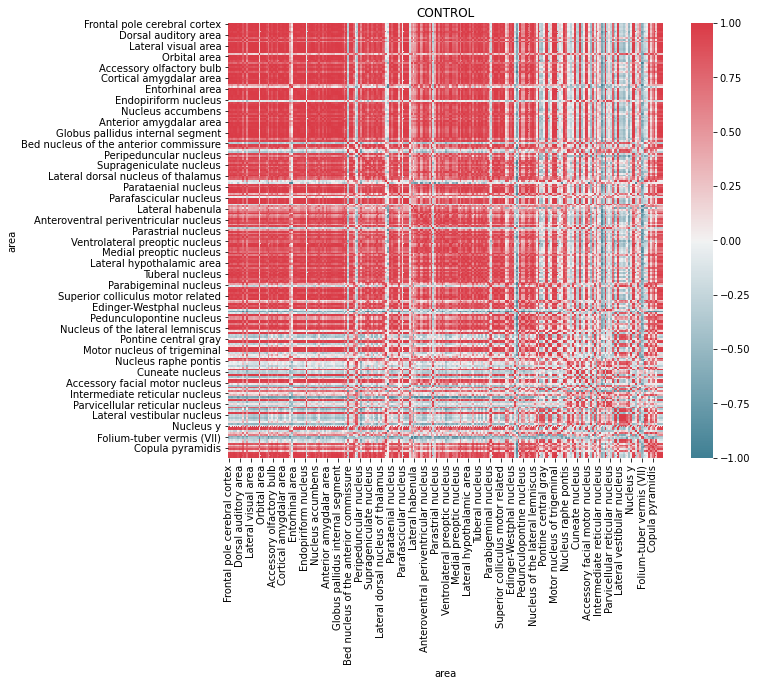

In [106]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

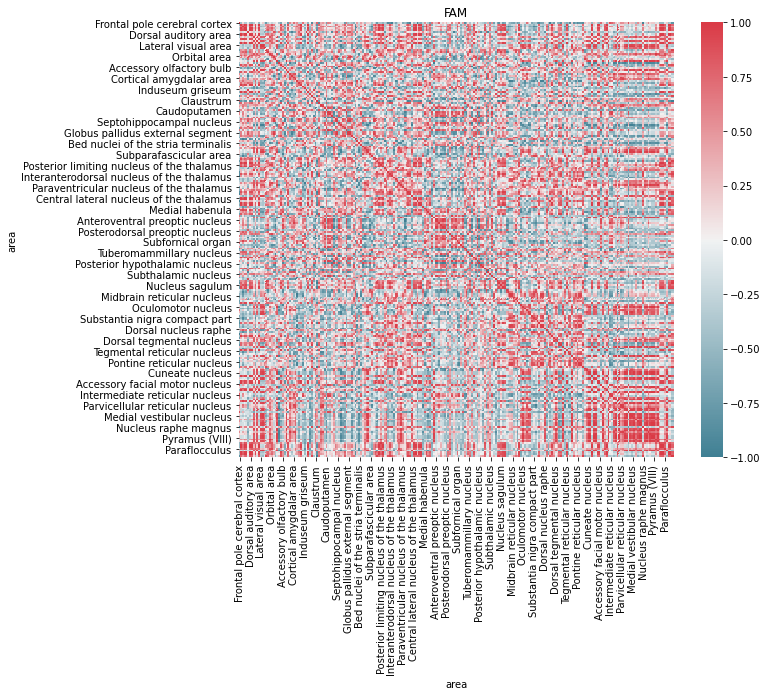

In [107]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

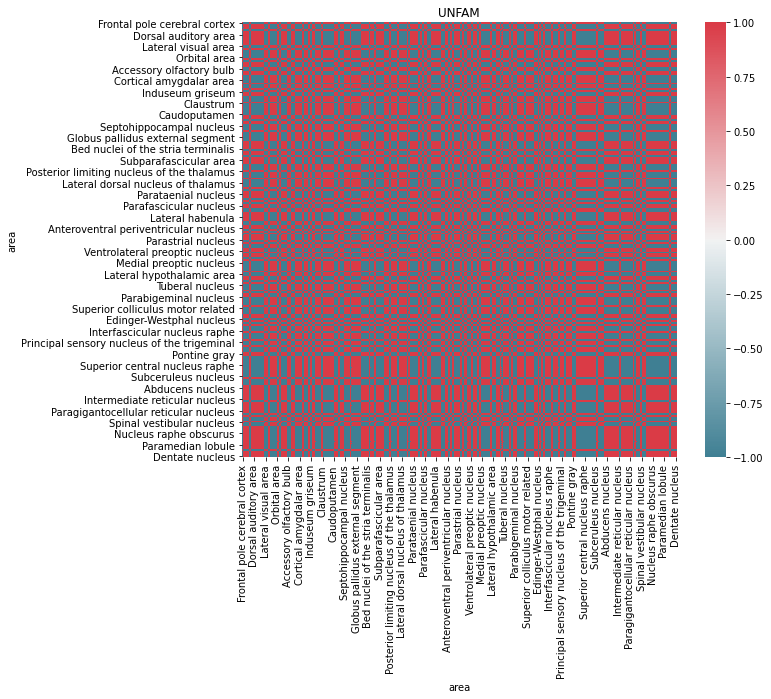

In [108]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')